<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

#### Load the first dataset and check the first two observations

In [95]:
df=pd.read_csv('winequality-data.csv')
df.drop('id',axis=1,inplace=True)
df.head(2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7


In [8]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

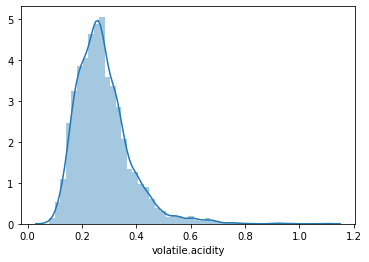

In [13]:
sns.distplot(df['volatile.acidity'])
plt.show()

In [15]:
import statsmodels.api as sm

y=df['quality']
x=df['volatile.acidity']
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     145.2
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           7.20e-33
Time:                        19:57:03   Log-Likelihood:                -5032.6
No. Observations:                3918   AIC:                         1.007e+04
Df Residuals:                    3916   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.3435      0.041    154.295      0.000       6.263       6.424
volatile.acidity    -1.6761      0.139    -12.052      0.000      -1.949      -1.403
==============================================================================
Omnibus:                       60.948   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.359
Skew:                           0.268   Prob(JB):                     2.36e-15
Kurtosis:                       3.354   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
print('Skewness before :',df['residual.sugar'].skew())

Skewness before : 1.1587050314028318


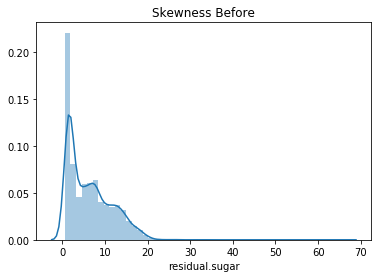

In [28]:
sns.distplot(df['residual.sugar'])
plt.title('Skewness Before')
plt.show()

In [25]:
df1=np.log(df['residual.sugar'])
print('Skewness After :',df1.skew())

Skewness After : -0.1584485247754562


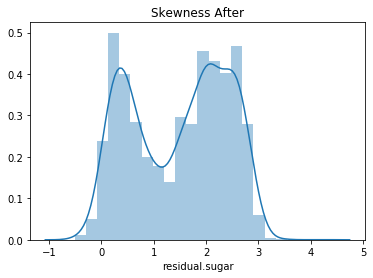

In [35]:
sns.distplot(df1)
plt.title('Skewness After')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

y=df['quality']
x=df.drop('quality',axis=1)
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()

vf=[]
for i in range(xc.shape[1]):
    vf.append(vif(xc.values,i))
pd.DataFrame(vf,index=xc.columns,columns=['vif'])

,vif
const,2.865220e+06
fixed.acidity,2.604673e+00
volatile.acidity,1.145852e+00
citric.acid,1.166757e+00
residual.sugar,1.224840e+01
chlorides,1.234383e+00
free.sulfur.dioxide,1.820974e+00
total.sulfur.dioxide,2.277981e+00
density,2.696213e+01
pH,2.129708e+00


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
print('Skewness before:',df['alcohol'].skew())
log=np.log(df['alcohol'])
sqrt=np.sqrt(df['alcohol'])
print('Log-skewness',log.skew())
print('Sqrt-skewness',sqrt.skew())

Skewness before: 0.49504313012158613
Log-skewness 0.3166016286788039
Sqrt-skewness 0.404924289841796


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['ph_ss']=ss.fit_transform(df[['pH']])

In [80]:
y=df['quality']
x=df.drop(['quality','ph_ss'],axis=1)
xc=sm.add_constant(x)
model1=sm.OLS(y,xc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          7.38e-284
Time:                        21:11:37   Log-Likelihood:                -4425.3
No. Observations:                3918   AIC:                             8875.
Df Residuals:                    3906   BIC:                             8950.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  139.6500     20.277      6.887      0.000      99.896     179.404
fixed.acidity            0.0621      0.023      2.704      0.007       0.017       0.107
volatile.acidity        -1.8962      0.128    -14.854      0.000      -2.146      -1.646
citric.acid              0.0314      0.107      0.294      0.769      -0.178       0.240
residual.sugar           0.0794      0.008      9.674      0.000       0.063       0.096
chlorides               -0.2643      0.630     -0.420      0.675      -1.499       0.970
free.sulfur.dioxide      0.0034      0.001      3.619      0.000       0.002       0.005
total.sulfur.dioxide    -0.0002      0.000     -0.510      0.610      -0.001       0.001
density               -139.7410     20.568     -6.794      0.000    -180.066     -99.416
pH                       0.6349      0.117      5.447      0.000       0.406       0.863
sulphates                0.5857      0.112      5.237      0.000       0.366       0.805
alcohol                  0.2212      0.026      8.432      0.000       0.170       0.273
==============================================================================
Omnibus:                       91.240   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.522
Skew:                           0.064   Prob(JB):                     1.74e-44
Kurtosis:                       4.104   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
y=df['quality']
x=df.drop(['quality','pH'],axis=1)
xc=sm.add_constant(x)
model2=sm.OLS(y,xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          7.38e-284
Time:                        21:11:48   Log-Likelihood:                -4425.3
No. Observations:                3918   AIC:                             8875.
Df Residuals:                    3906   BIC:                             8950.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  141.6739     20.501      6.911      0.000     101.481     181.867
fixed.acidity            0.0621      0.023      2.704      0.007       0.017       0.107
volatile.acidity        -1.8962      0.128    -14.854      0.000      -2.146      -1.646
citric.acid              0.0314      0.107      0.294      0.769      -0.178       0.240
residual.sugar           0.0794      0.008      9.674      0.000       0.063       0.096
chlorides               -0.2643      0.630     -0.420      0.675      -1.499       0.970
free.sulfur.dioxide      0.0034      0.001      3.619      0.000       0.002       0.005
total.sulfur.dioxide    -0.0002      0.000     -0.510      0.610      -0.001       0.001
density               -139.7410     20.568     -6.794      0.000    -180.066     -99.416
sulphates                0.5857      0.112      5.237      0.000       0.366       0.805
alcohol                  0.2212      0.026      8.432      0.000       0.170       0.273
ph_ss                    0.0952      0.017      5.447      0.000       0.061       0.130
==============================================================================
Omnibus:                       91.240   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.522
Skew:                           0.064   Prob(JB):                     1.74e-44
Kurtosis:                       4.104   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

y=df['quality']
x=df.drop('quality',axis=1)
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()

vf=[]
for i in range(xc.shape[1]):
    vf.append(vif(xc.values,i))
w=pd.DataFrame(vf,index=xc.columns,columns=['vif'])
print(w[w['vif']>9])

model.summary()

                         vif
const           2.865220e+06
residual.sugar  1.224840e+01
density         2.696213e+01


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          7.38e-284
Time:                        22:06:17   Log-Likelihood:                -4425.3
No. Observations:                3918   AIC:                             8875.
Df Residuals:                    3906   BIC:                             8950.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  139.6500     20.277      6.887      0.000      99.896     179.404
fixed.acidity            0.0621      0.023      2.704      0.007       0.017       0.107
volatile.acidity        -1.8962      0.128    -14.854      0.000      -2.146      -1.646
citric.acid              0.0314      0.107      0.294      0.769      -0.178       0.240
residual.sugar           0.0794      0.008      9.674      0.000       0.063       0.096
chlorides               -0.2643      0.630     -0.420      0.675      -1.499       0.970
free.sulfur.dioxide      0.0034      0.001      3.619      0.000       0.002       0.005
total.sulfur.dioxide    -0.0002      0.000     -0.510      0.610      -0.001       0.001
density               -139.7410     20.568     -6.794      0.000    -180.066     -99.416
pH                       0.6349      0.117      5.447      0.000       0.406       0.863
sulphates                0.5857      0.112      5.237      0.000       0.366       0.805
alcohol                  0.2212      0.026      8.432      0.000       0.170       0.273
==============================================================================
Omnibus:                       91.240   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.522
Skew:                           0.064   Prob(JB):                     1.74e-44
Kurtosis:                       4.104   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

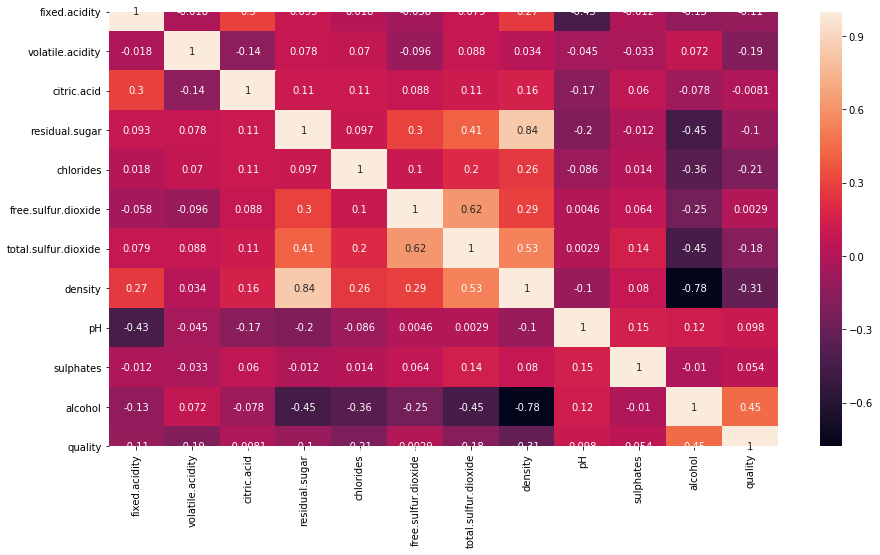

In [110]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [111]:
xc.drop(['total.sulfur.dioxide','chlorides','citric.acid'],axis=1,inplace=True)

In [113]:
vf=[]
for i in range(xc.shape[1]):
    vf.append(vif(xc.values,i))
w=pd.DataFrame(vf,index=xc.columns,columns=['vif'])
w[w>9]

,vif
const,2.672776e+06
fixed.acidity,NaN
volatile.acidity,NaN
residual.sugar,1.156637e+01
free.sulfur.dioxide,NaN
density,2.510643e+01
pH,NaN
sulphates,NaN
alcohol,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here